# Plotting using the Mapping API

Mapping uses the algorithms outlined in B. Sundman, N. Dupin, B. Hallstedt, *Calphad* 75 (2021) 102330 to construct phase diagrams by stepping along phase boundaries.

binplot and ternplot are thin wrappers around the binary and ternary mapping strategies; however, additional plotting capabilities are available through the mapping module.

## Binary phase diagrams with mapping

This shows how to plot a binary phase diagram through mapping as an alternative to binplot.

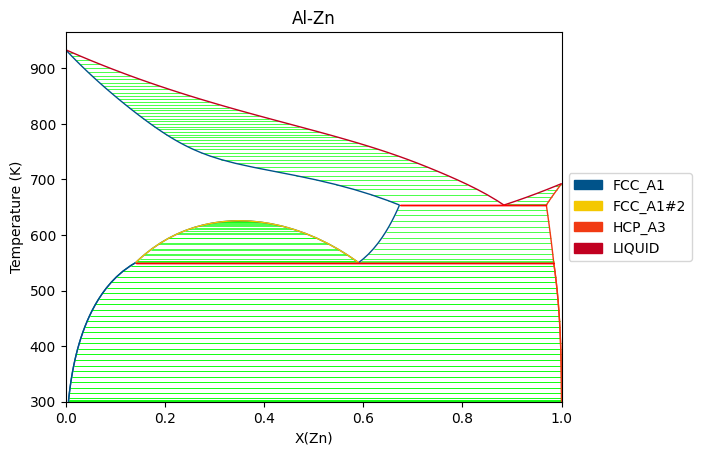

In [1]:
from pycalphad import Database, variables as v
from pycalphad.mapping import BinaryStrategy, plot_binary
import matplotlib.pyplot as plt

dbf = Database('alzn_mey.tdb')
comps = ['AL', 'ZN', 'VA']
conds = {v.N: 1, v.P:101325, v.T: (300, 1000, 10), v.X('ZN'):(0, 1, 0.02)}

# Phases will be automatically filtered with components if no phases are passed
binary = BinaryStrategy(dbf, comps, phases=None, conditions=conds)
binary.do_map()
plot_binary(binary)
plt.show()


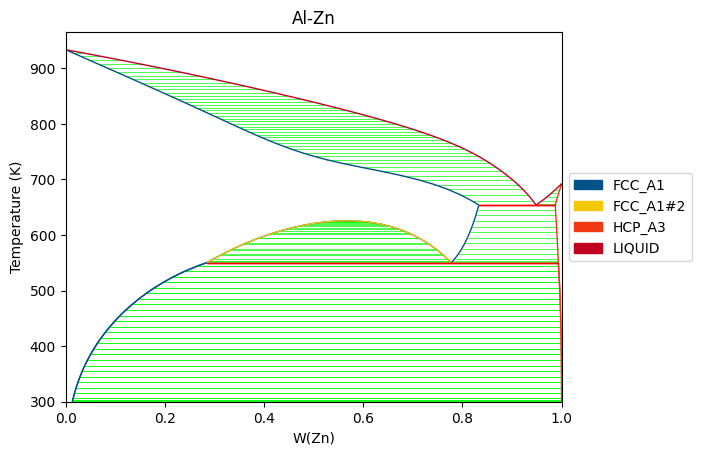

In [2]:
# Plotting in weight fraction
ax = plot_binary(binary, v.W('ZN'), v.T)
ax.set_xlim([0, 1])
plt.show()

Similarly, the same can be done for ternaries using TernaryStrategy and plot_ternary.

## Step plotting

Step mapping allows computing equilibrium along a single axis. By default, step plotting will plot phase fraction vs. variable axis, but this can be modified through plotting.

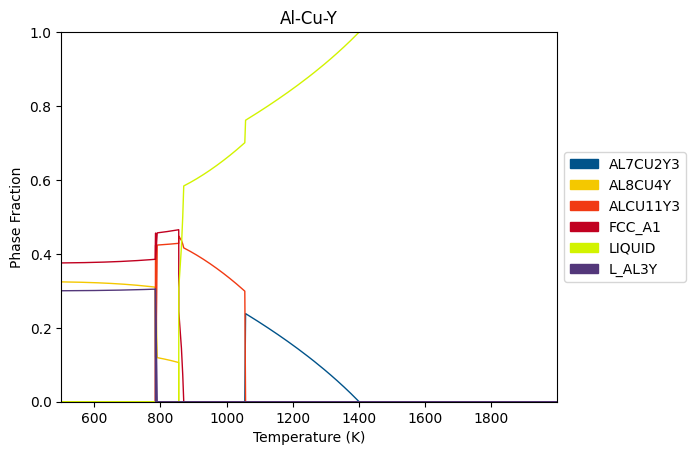

In [3]:
from pycalphad.mapping import StepStrategy, plot_step

dbf = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
conds = {v.T: (500, 2000, 10), v.X('AL'): 0.8, v.X('CU'): 0.1, v.P: 101325, v.N: 1}

step = StepStrategy(dbf, comps, phases=None, conditions=conds)
step.do_map()

plot_step(step)
plt.show()

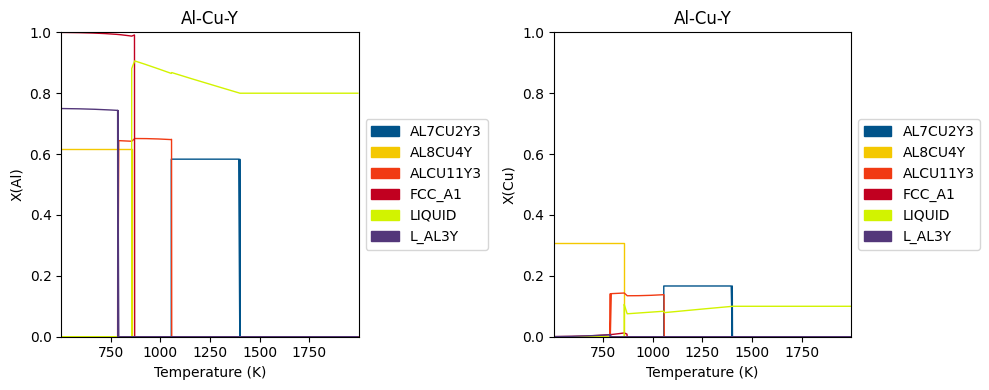

In [4]:
# Plotting composition of Al and Cu in each phase
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_step(step, x=v.T, y=v.X('AL'), ax=ax[0])
plot_step(step, x=v.T, y=v.X('CU'), ax=ax[1])
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
fig.tight_layout()

plt.show()

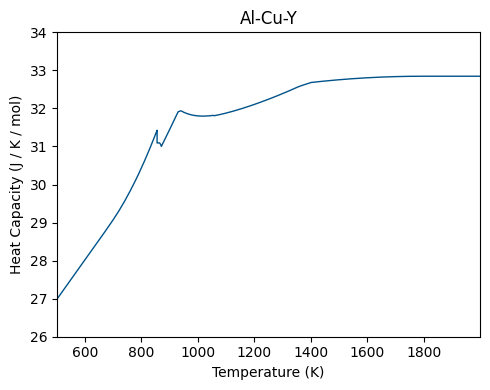

In [5]:
# Plotting heat capacity vs T
fig, ax = plt.subplots(figsize=(5,4))
plot_step(step, x=v.T, y='CPM', ax=ax)
ax.set_ylim([26, 34])
fig.tight_layout()

plt.show()

## Isopleth plotting

For multicomponent systems, isopleths can be computed and plotted.

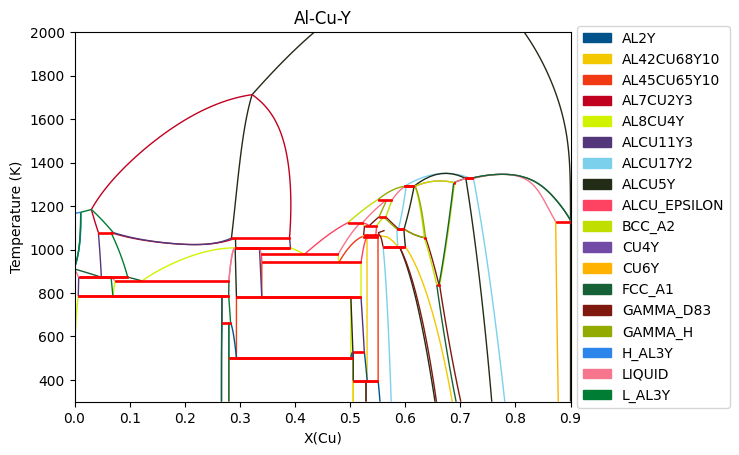

In [6]:
from pycalphad.mapping import IsoplethStrategy, plot_isopleth

dbf = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
conds = {v.T: (300, 2000, 10), v.P: 101325, v.N: 1, v.X('Y'): 0.1, v.X('CU'): (0, 1, 0.01)}

iso = IsoplethStrategy(dbf, comps, phases=None, conditions=conds)
iso.do_map()
plot_isopleth(iso)
plt.show()